In [1]:
import pandas as pd
import altair as alt

In [2]:
alt.themes.enable('opaque')
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [3]:
df = pd.read_csv("./input/war_daily_pitch.txt")

In [4]:
df.head()

,name_common,age,mlb_ID,player_ID,year_ID,team_ID,stint_ID,lg_ID,G,GS,...,pyth_exponent,waa_win_perc,WAA,WAA_adj,oppRpG_rep,pyth_exponent_rep,waa_win_perc_rep,WAR_rep,ERA_plus,ER_lg
0,David Aardsma,22.0,430911.0,aardsda01,2004,SFG,1,NL,11,0,...,1.902,0.4803,-0.2167,-0.0299,4.75633,1.895,0.4914,0.0942,66.675000,5.334
1,David Aardsma,24.0,430911.0,aardsda01,2006,CHC,1,NL,45,0,...,1.909,0.5061,0.2745,-0.1316,4.97303,1.919,0.4896,0.4682,114.295833,27.431
2,David Aardsma,25.0,430911.0,aardsda01,2007,CHW,1,AL,25,0,...,1.924,0.4782,-0.5450,-0.1995,5.00394,1.920,0.4859,0.3459,74.086956,17.040
3,David Aardsma,26.0,430911.0,aardsda01,2008,BOS,1,AL,47,0,...,1.904,0.4836,-0.7708,-0.0648,4.81624,1.901,0.4888,0.5205,83.796667,25.139
4,David Aardsma,27.0,430911.0,aardsda01,2009,SEA,1,AL,73,0,...,1.899,0.5105,0.7665,0.1574,4.90529,1.911,0.4894,0.7666,168.910000,33.782


### Lester vs. himself

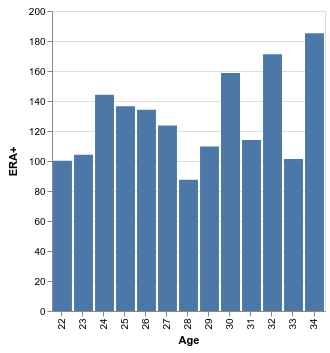

In [5]:
alt.Chart(df).mark_bar().encode(
    x=alt.X("age:O", axis=alt.Axis(title="Age")),
    y=alt.Y("ERA_plus:Q", axis=alt.Axis(title="ERA+")),
).transform_filter(alt.datum.name_common == 'Jon Lester')

### Lester vs. all starters ever

In [6]:
qualified_df = df[(df.age < 46) & (df.age > 17)]
qualified_df = qualified_df[~pd.isnull(qualified_df.age)]
qualified_df = qualified_df[(qualified_df.GS > 15) | (qualified_df.name_common == 'Jon Lester')]

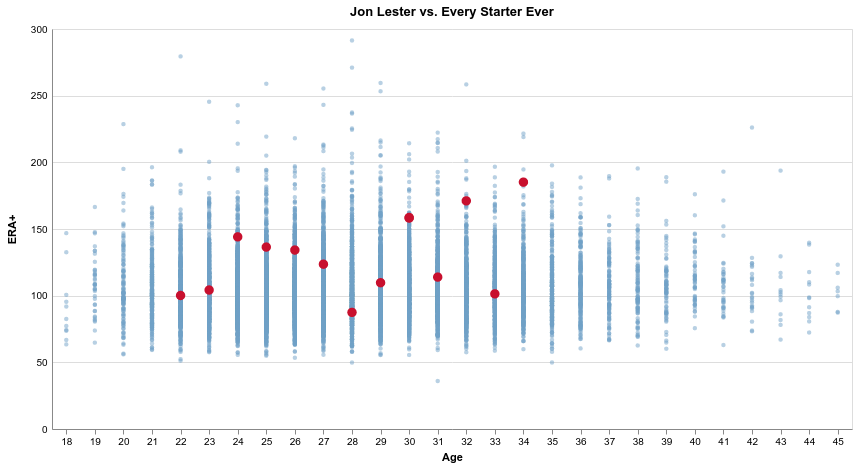

In [19]:
base = alt.Chart(qualified_df, title="Jon Lester vs. Every Starter Ever").properties(width=800, height=400).encode(
    x=alt.X("age:O", axis=alt.Axis(title="Age", labelAngle=0)),
    y=alt.Y("ERA_plus:Q", axis=alt.Axis(title="ERA+", tickCount=5, labelPadding=5, tickSize=0)),
    tooltip=["name_common", "year_ID", "ERA_plus"]
)

field = base.mark_circle(color="#71a0c6", size=20, opacity=0.5).transform_filter(alt.datum.name_common != 'Jon Lester')
lester = base.mark_circle(color="#C8102E", size=90, opacity=1).transform_filter(alt.datum.name_common == 'Jon Lester')

field + lester

### Top Age 34 seasons

In [22]:
qualified_df[qualified_df.age == 34].sort_values("ERA_plus", ascending=False)[[
    'name_common',
    'year_ID',
    'team_ID',
    'ERA_plus'
]].head(10).set_index("name_common")

,year_ID,team_ID,ERA_plus
name_common,,,
Roger Clemens,1997,TOR,221.573333
Cy Young,1901,BOS,218.980597
Nolan Ryan,1981,HOU,194.667857
Jon Lester,2018,CHC,185.140000
Chris Carpenter,2009,STL,181.941667
Al Benton,1945,DET,175.358139
Thornton Lee,1941,CHW,173.654430
Danny Darwin,1990,HOU,168.562500
Ray Kremer,1927,PIT,168.306452


### Top ERA+ this season

In [21]:
qualified_df[qualified_df.year_ID == 2018].sort_values("ERA_plus", ascending=False)[[
    'name_common',
    'age',
    'ERA_plus'
]].head(10).set_index("name_common")

,age,ERA_plus
name_common,,
Luis Severino,24.0,213.957692
Jacob deGrom,30.0,206.100000
Mike Foltynewicz,26.0,192.115000
Max Scherzer,33.0,188.741379
Jon Lester,34.0,185.140000
Chris Sale,29.0,181.077419
Trevor Bauer,27.0,179.590909
Justin Verlander,35.0,177.810714
Blake Snell,25.0,176.307407
